# Project 1

In [2]:
import pandas as pd
data = pd.read_csv('../Data/diamonds.csv')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
data.shape

(53940, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


# Missing values

In [5]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [7]:
data.shape

(53940, 10)

In [8]:
# Remove 0 values from x, y, z
data = data[data['x'] != 0]
data = data[data['y'] != 0]
data = data[data['z'] != 0]

In [9]:
data.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


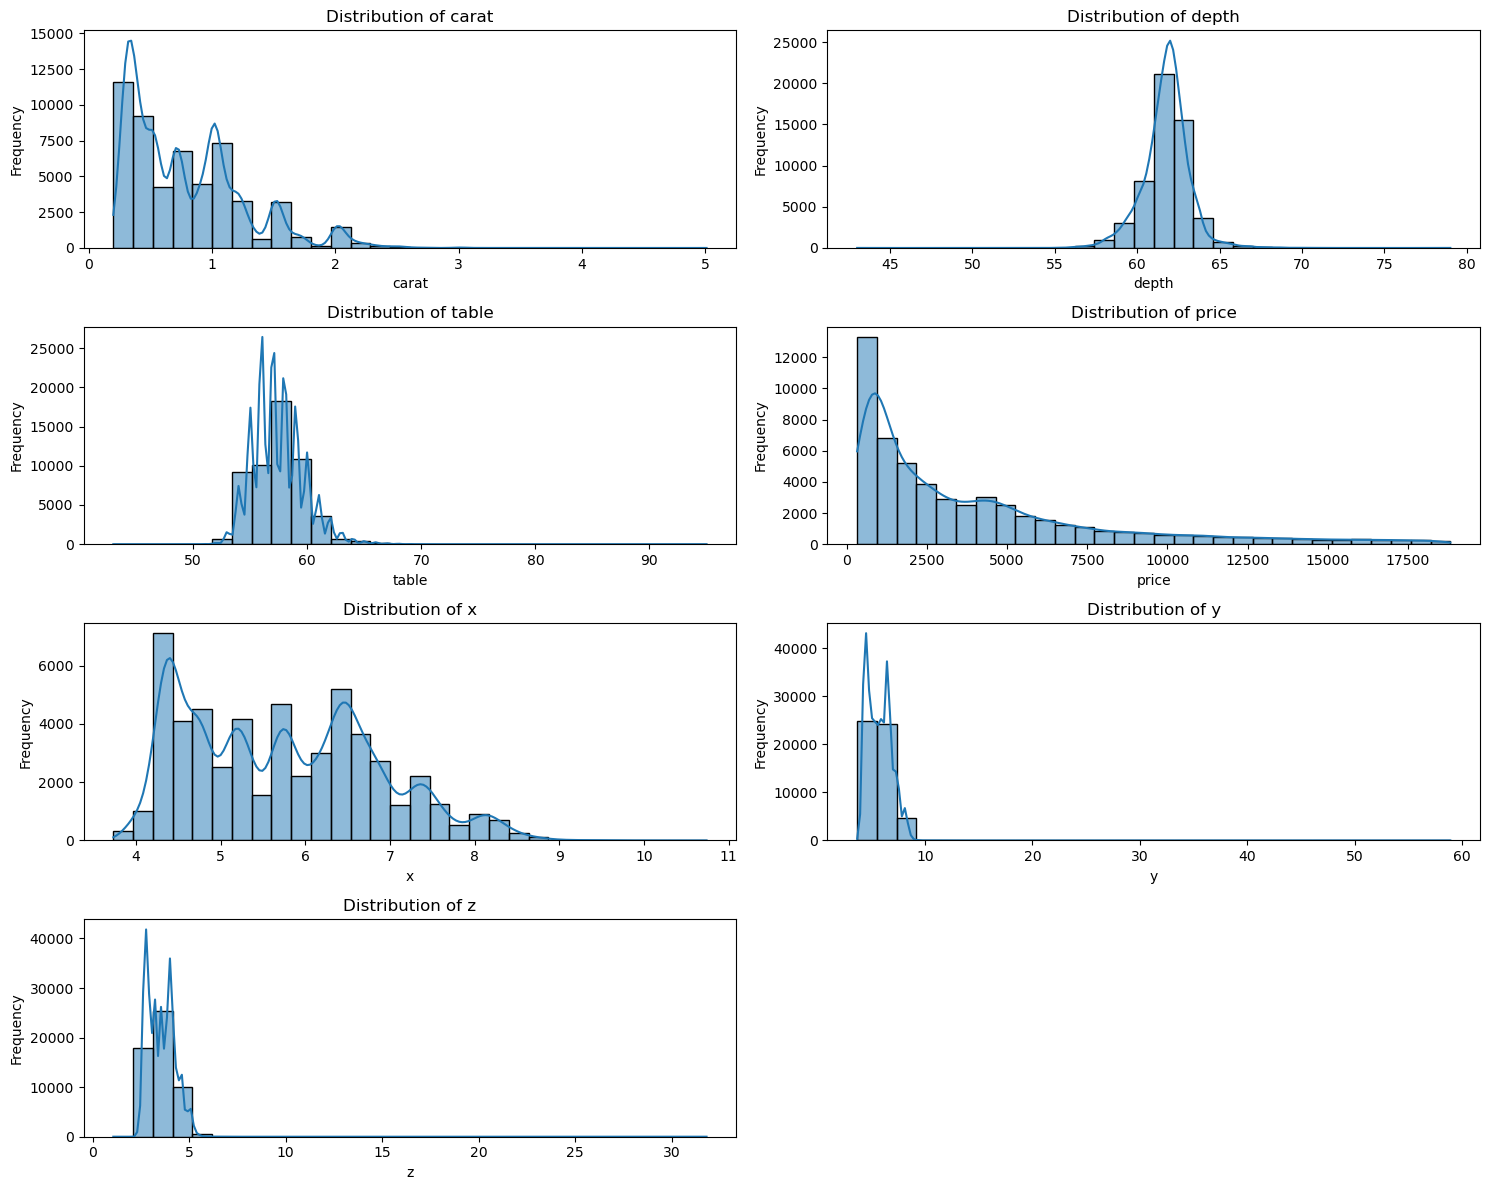

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

plt.figure(figsize=(15, 12))

for i, feature in enumerate(numerical_features):
    plt.subplot(4, 2, i+1)
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

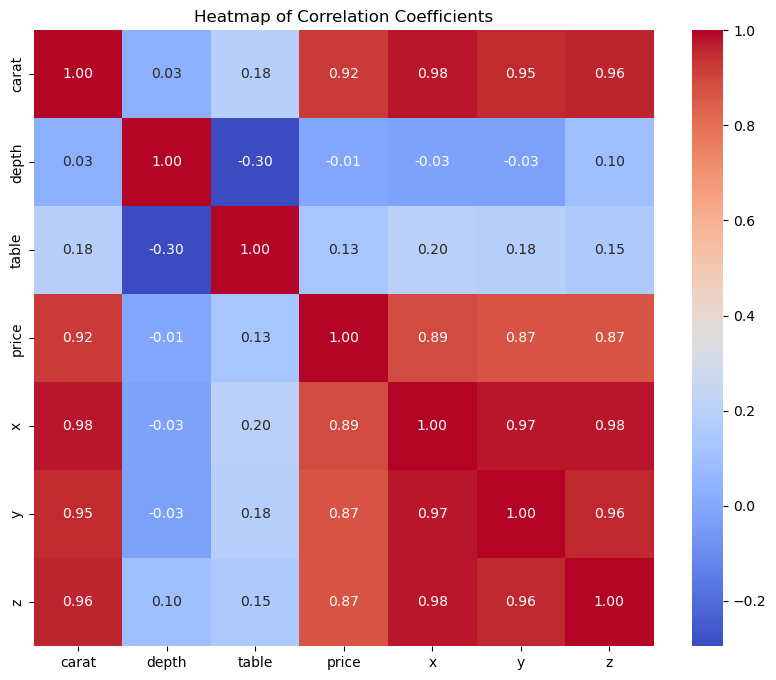

In [11]:
# Calculate the correlation matrix
correlation_matrix = data[numerical_features].corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Coefficients')
plt.show()


# Outliers

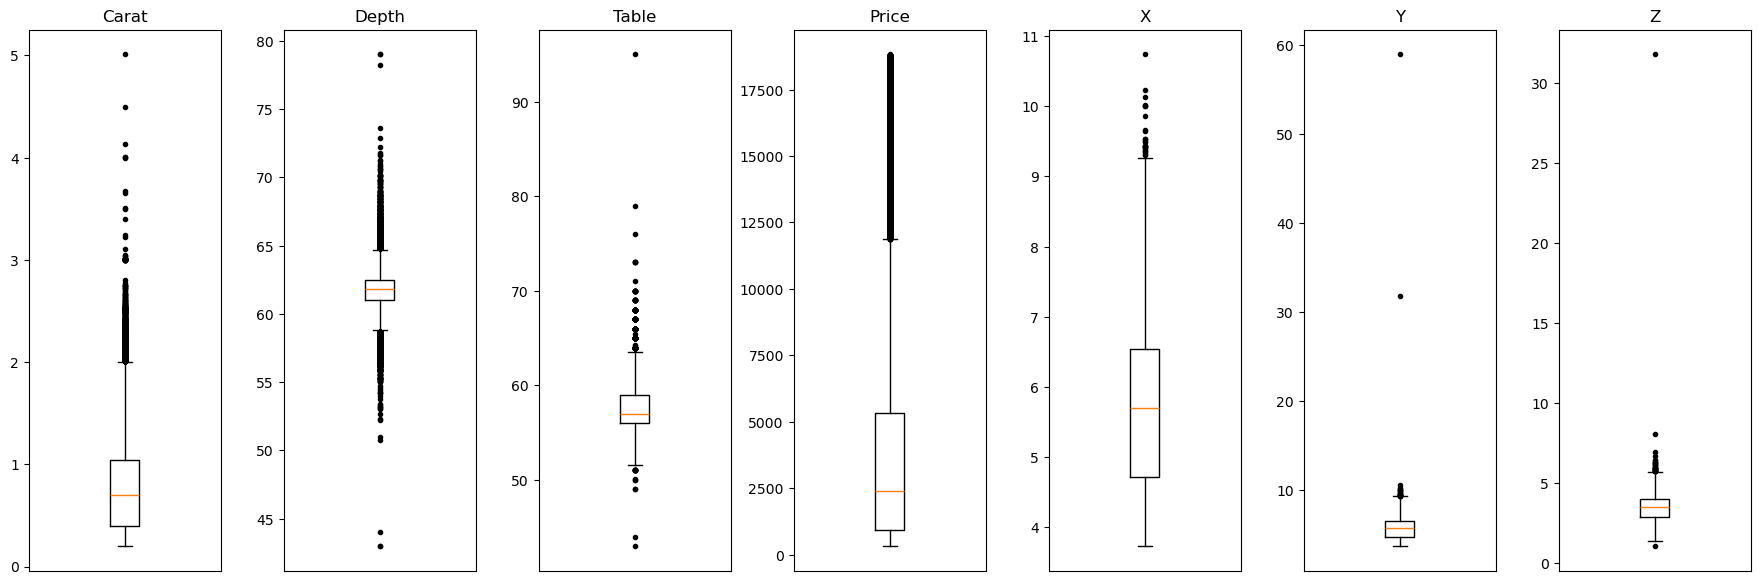

In [12]:
import matplotlib.pyplot as plt

numerical_columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

fig, axes = plt.subplots(1, 7, figsize=(18, 6)) 

fig.tight_layout()

for ax, col in zip(axes, numerical_columns):
    ax.boxplot(data[col], sym="k.")  
    ax.set_title(col.capitalize()) 
    ax.set_xticks([]) 

plt.show()


#### Standardize the values

In [13]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

diamonds_data = pd.read_csv('../Data/diamonds.csv')

means = diamonds_data[numerical_columns].mean()
stds = diamonds_data[numerical_columns].std()

print("Means:\n", means)
print("\nStandard Deviations:\n", stds)

diamonds_data_standardized = diamonds_data[numerical_columns].copy()

for column in numerical_columns:
    diamonds_data_standardized[column] = (diamonds_data[column] - means[column]) / stds[column]

print(diamonds_data_standardized.head())

Means:
 carat       0.797940
depth      61.749405
table      57.457184
price    3932.799722
x           5.731157
y           5.734526
z           3.538734
dtype: float64

Standard Deviations:
 carat       0.474011
depth       1.432621
table       2.234491
price    3989.439738
x           1.121761
y           1.142135
z           0.705699
dtype: float64
      carat     depth     table     price         x         y         z
0 -1.198157 -0.174090 -1.099662 -0.904087 -1.587823 -1.536181 -1.571115
1 -1.240350 -1.360726  1.585514 -0.904087 -1.641310 -1.658759 -1.741159
2 -1.198157 -3.384987  3.375631 -0.903836 -1.498677 -1.457382 -1.741159
3 -1.071577  0.454129  0.242926 -0.902081 -1.364959 -1.317293 -1.287708
4 -1.029384  1.082348  0.242926 -0.901831 -1.240155 -1.212227 -1.117663


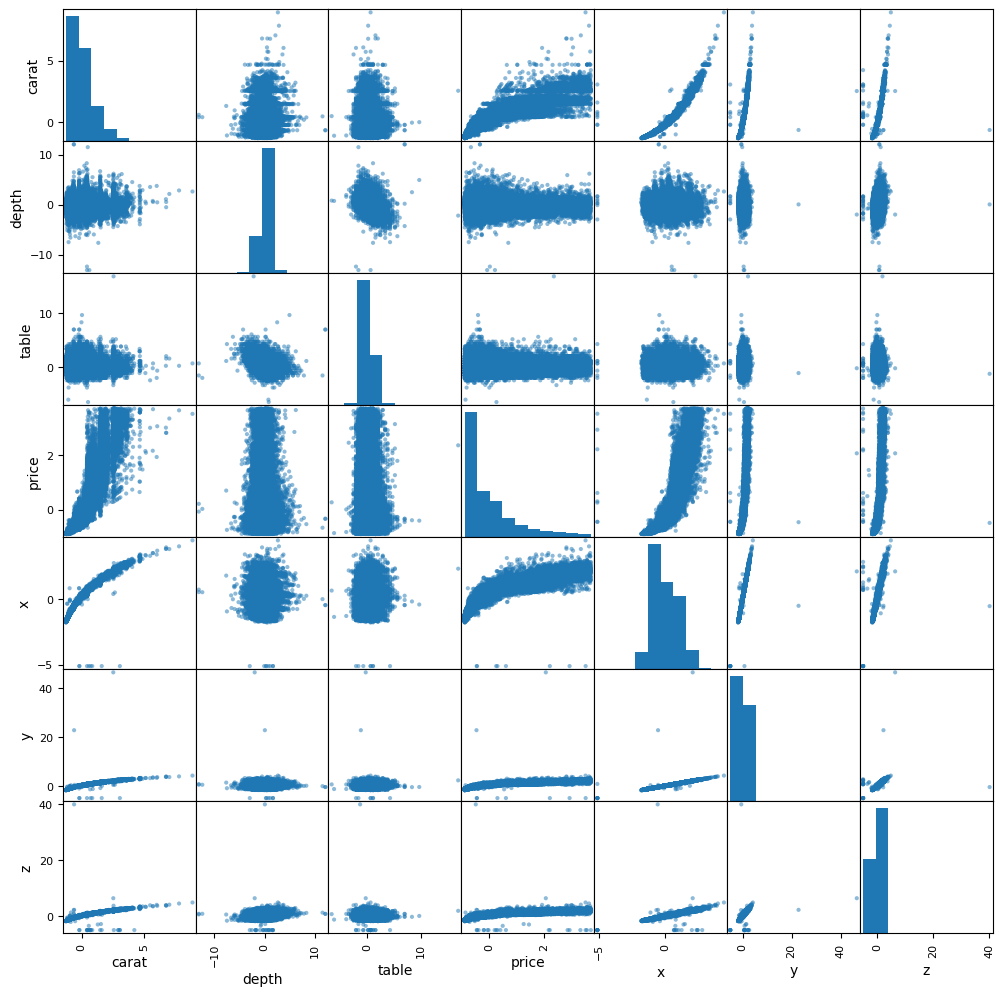

In [14]:
from pandas.plotting import scatter_matrix

scatter_matrix(diamonds_data_standardized, figsize=(12, 12))
plt.show()

### PCA

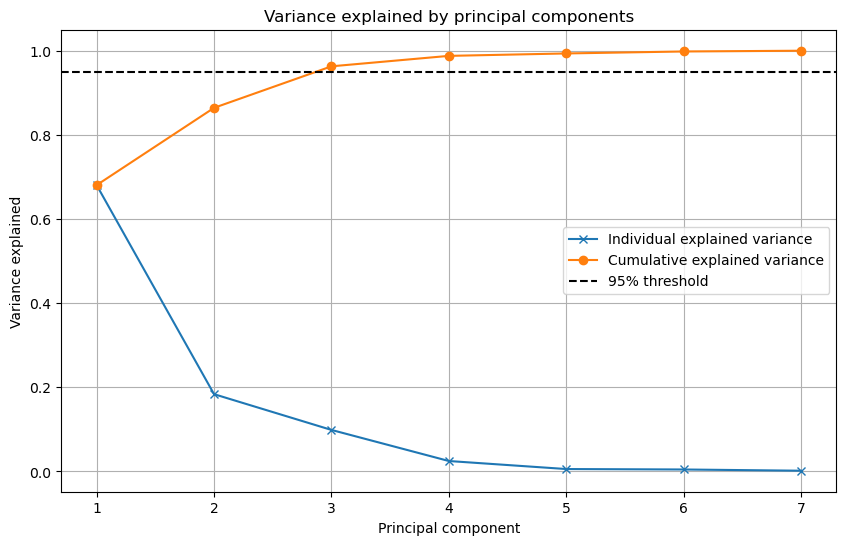

,Principal Component,Variance Explained,Cumulative Variance Explained
0,PC1,0.680559,0.680559
1,PC2,0.183695,0.864255
2,PC3,0.098687,0.962942
3,PC4,0.024822,0.987764
4,PC5,0.005758,0.993522
5,PC6,0.004707,0.998229
6,PC7,0.001771,1.000000


In [15]:
from scipy.linalg import svd
import numpy as np

# PCA using SVD
U, S, Vt = svd(diamonds_data_standardized, full_matrices=False)

# variance explained by each principal component
rho = (S ** 2) / np.sum(S ** 2)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(rho) + 1), rho, 'x-', label='Individual explained variance')
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), 'o-', label='Cumulative explained variance')
plt.axhline(y=0.95, color='k', linestyle='--', label='95% threshold')
plt.title('Variance explained by principal components')
plt.xlabel('Principal component')
plt.ylabel('Variance explained')
plt.legend()
plt.grid(True)
plt.show()


# display variance and cumulative variance in a table
variance_data = {
    'Principal Component': [f'PC{i+1}' for i in range(len(rho))],
    'Variance Explained': rho,
    'Cumulative Variance Explained': np.cumsum(rho)
}

variance_df = pd.DataFrame(variance_data)

display(variance_df)

In [16]:
# Print the principal directions (Vt)
print("Principal directions (Vt):\n", Vt)

# Show in a table
pc_df = pd.DataFrame(Vt.T, index=numerical_columns, columns=[f'PC{i+1}' for i in range(Vt.shape[0])])
pc_df



Principal directions (Vt):
 [[ 0.45244549 -0.00091613  0.09951609  0.42551927  0.45321251  0.4472649
   0.44595366]
 [-0.03469601 -0.73067971  0.67506738 -0.03525794  0.00351255  0.00215791
  -0.08903518]
 [-0.00549481  0.67282929  0.72806947 -0.10544948 -0.03950882 -0.05418879
   0.03960344]
 [-0.06835945 -0.047248   -0.0595406  -0.84977817  0.24299509  0.32846061
   0.31700727]
 [ 0.13399948 -0.08873829 -0.01037614 -0.05377206  0.08898016 -0.77405793
   0.60339656]
 [ 0.76815114  0.01445027 -0.02526831 -0.27330947  0.19846061 -0.21526655
  -0.4986704 ]
 [-0.42588029  0.05560026  0.00204926  0.08281429  0.82865822 -0.20885709
  -0.27995794]]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
carat,0.452445,-0.034696,-0.005495,-0.068359,0.133999,0.768151,-0.425880
depth,-0.000916,-0.730680,0.672829,-0.047248,-0.088738,0.014450,0.055600
table,0.099516,0.675067,0.728069,-0.059541,-0.010376,-0.025268,0.002049
price,0.425519,-0.035258,-0.105449,-0.849778,-0.053772,-0.273309,0.082814
x,0.453213,0.003513,-0.039509,0.242995,0.088980,0.198461,0.828658
y,0.447265,0.002158,-0.054189,0.328461,-0.774058,-0.215267,-0.208857
z,0.445954,-0.089035,0.039603,0.317007,0.603397,-0.498670,-0.279958


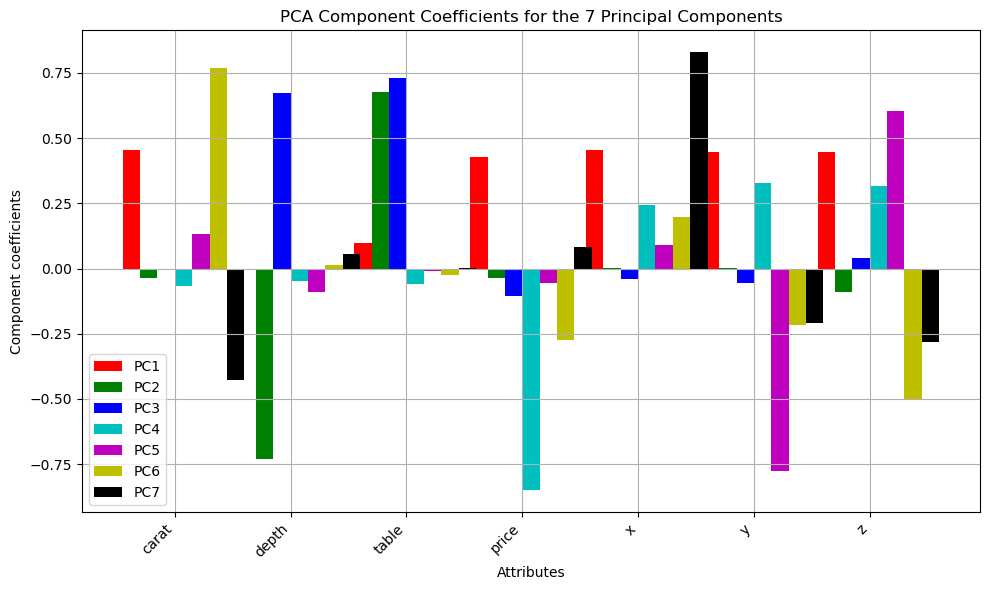

In [17]:
# Transpose Vt to get PC directions
V = Vt.T

pcs = [0, 1, 2, 3, 4, 5, 6] 

# plotting
M = diamonds_data_standardized.shape[1] 
attribute_names = numerical_columns  
legend_strs = [f"PC{e+1}" for e in pcs]  
bw = 0.15 
r = np.arange(1, M + 1) 
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k'] 

plt.figure(figsize=(10, 6))
for i, pc in enumerate(pcs):
    plt.bar(r + i * bw, V[:, pc], width=bw, color=colors[i], label=f"PC{pc+1}")

plt.xticks(r + bw * 2.5, attribute_names, rotation=45, ha="right")
plt.xlabel("Attributes")
plt.ylabel("Component coefficients")
plt.title("PCA Component Coefficients for the 7 Principal Components")
plt.legend(legend_strs)
plt.grid(True)
plt.tight_layout()

plt.show()

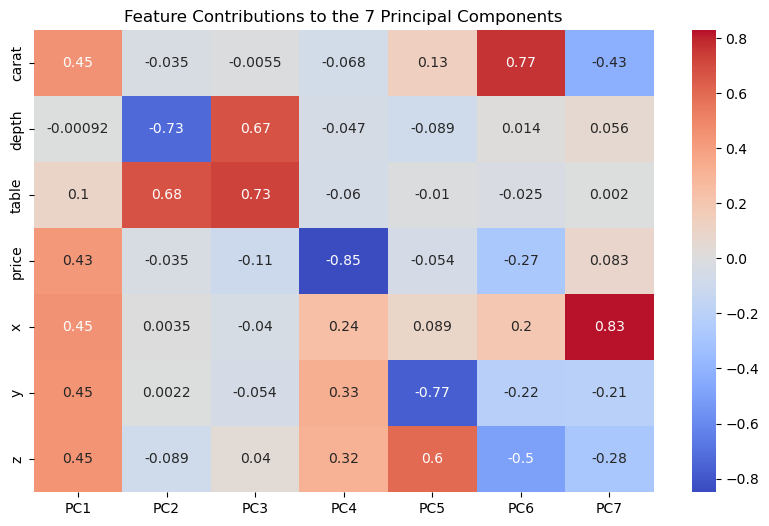

In [18]:
# Create heatmap
pc_contributions = pd.DataFrame(V[:, pcs], index=attribute_names, columns=[f"PC{i+1}" for i in pcs])

plt.figure(figsize=(10, 6))
sns.heatmap(pc_contributions, annot=True, cmap="coolwarm", center=0)
plt.title("Feature Contributions to the 7 Principal Components")
plt.show()

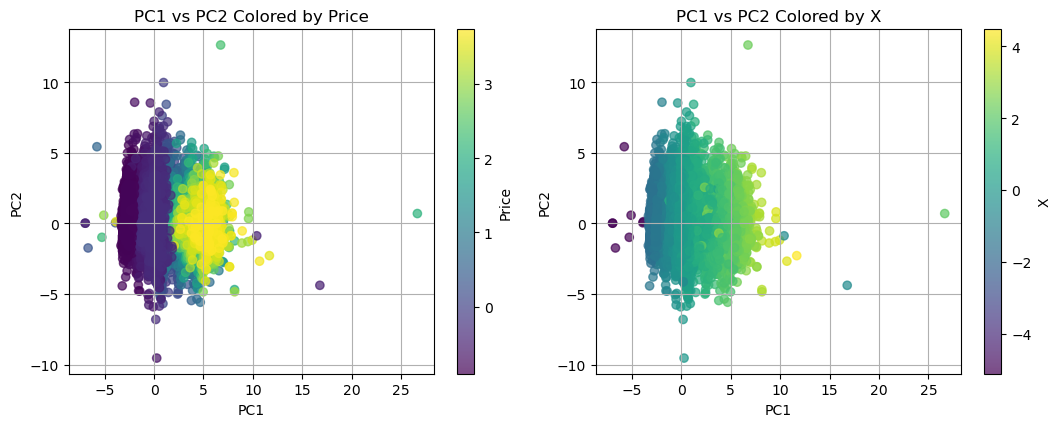

In [19]:
# project data onto some of the PCs
Z = np.dot(diamonds_data_standardized, V[:, pcs])

# Plot PC1 vs PC2 colored by price and x
numerical_features_to_plot = ['price', 'x']
plt.figure(figsize=(16, 12))

for i, feature in enumerate(numerical_features_to_plot):
    plt.subplot(3, 3, i + 1)  # Create subplots
    scatter = plt.scatter(Z[:, 0], Z[:, 1], c=diamonds_data_standardized[feature], cmap='viridis', alpha=0.7)
    plt.title(f"PC1 vs PC2 Colored by {feature.capitalize()}")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)
    cbar = plt.colorbar(scatter)
    cbar.set_label(feature.capitalize())

plt.tight_layout()
plt.show()



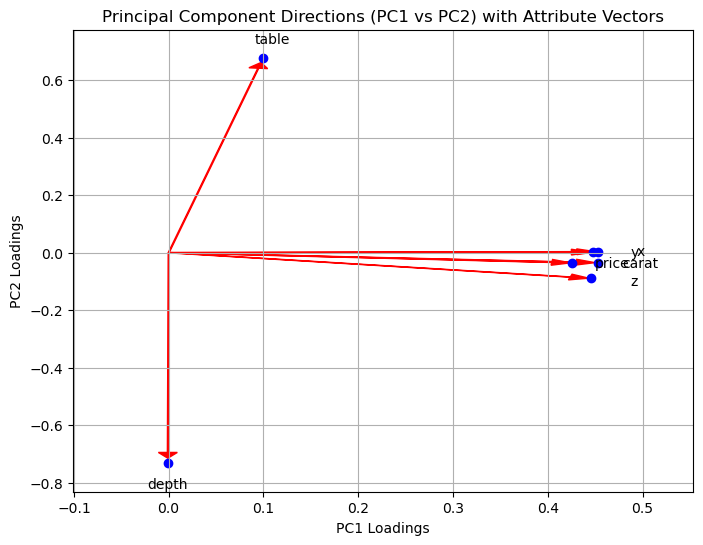

In [20]:
pc1_loadings = V[:, 0] 
pc2_loadings = V[:, 1]

# Scale vectors
scaling_factor = 0.95

plt.figure(figsize=(8, 6))

# Add vectors for each attribute from (0,0))
for i, feature in enumerate(attribute_names):
    # Draw vectors
    plt.arrow(0, 0, pc1_loadings[i] * scaling_factor, pc2_loadings[i] * scaling_factor, 
              head_width=0.02, head_length=0.02, fc='r', ec='r')

    # Draw dots
    plt.scatter(pc1_loadings[i], pc2_loadings[i], color='b')

    # Add labels
    plt.text(pc1_loadings[i] * 1.1, pc2_loadings[i] * 1.1, feature, ha='center', va='center', fontsize=10)

plt.xlim(min(pc1_loadings) - 0.1, max(pc1_loadings) + 0.1)
plt.ylim(min(pc2_loadings) - 0.1, max(pc2_loadings) + 0.1)

plt.xlabel('PC1 Loadings')
plt.ylabel('PC2 Loadings')
plt.title('Principal Component Directions (PC1 vs PC2) with Attribute Vectors')

plt.grid(True)

plt.show()

---
# Project 2
---

## Regression Part A

### 1. One-of-K coding

In [25]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd

data = data[data['x'] != 0]
data = data[data['y'] != 0]
data = data[data['z'] != 0]

# Separate features (X) and target (y)
X = data.drop(columns=['price'], axis=1)  # Assuming 'price' is the target variable
y = data['price']

print("Shape of X:", X.shape)
print("Length of y:", len(y))

# Identify categorical columns
categorical_columns = ['cut', 'color', 'clarity']

# Apply OneHotEncoder to categorical columns
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_categorical_encoded = encoder.fit_transform(X[categorical_columns])

# Combine encoded categorical data with the rest of X
X_non_categorical = X.drop(columns=categorical_columns)
X_encoded = pd.concat(
    [X_non_categorical.reset_index(drop=True),
     pd.DataFrame(X_categorical_encoded, columns=encoder.get_feature_names_out(categorical_columns))],
    axis=1
)

# Standardize all features
scaler = StandardScaler()
X_std = pd.DataFrame(scaler.fit_transform(X_encoded), columns=X_encoded.columns)

# Display the standardized data
X_std.head()



Shape of X: (53920, 9)
Length of y: 53920


,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.198204,-0.174203,-1.099725,-1.591573,-1.539219,-1.580084,-0.316234,1.225692,-0.585917,-0.537354,...,-0.426481,-0.334328,-0.234389,-0.185303,-0.565442,2.206908,-0.422586,-0.542311,-0.269617,-0.32202
1,-1.240417,-1.361090,1.585988,-1.645173,-1.662014,-1.750896,-0.316234,-0.815866,1.706727,-0.537354,...,-0.426481,-0.334328,-0.234389,-0.185303,1.768527,-0.453123,-0.422586,-0.542311,-0.269617,-0.32202
2,-1.198204,-3.385781,3.376463,-1.502241,-1.460280,-1.750896,3.162213,-0.815866,-0.585917,-0.537354,...,-0.426481,-0.334328,-0.234389,-0.185303,-0.565442,-0.453123,2.366380,-0.542311,-0.269617,-0.32202
3,-1.071566,0.454149,0.243131,-1.368242,-1.319943,-1.295396,-0.316234,-0.815866,1.706727,-0.537354,...,-0.426481,2.991071,-0.234389,-0.185303,-0.565442,-0.453123,-0.422586,1.843962,-0.269617,-0.32202
4,-1.029353,1.082501,0.243131,-1.243176,-1.214690,-1.124583,3.162213,-0.815866,-0.585917,-0.537354,...,-0.426481,-0.334328,4.266413,-0.185303,-0.565442,2.206908,-0.422586,-0.542311,-0.269617,-0.32202


### 2. regularization

In [39]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Convert to NumPy arrays
X_std_np = X_std.values
y_np = y.values

# Verify shapes
print("Shape of X_std_np:", X_std_np.shape)
print("Shape of y_np:", y_np.shape)



Shape of X_std_np: (53920, 23)
Shape of y_np: (53920,)


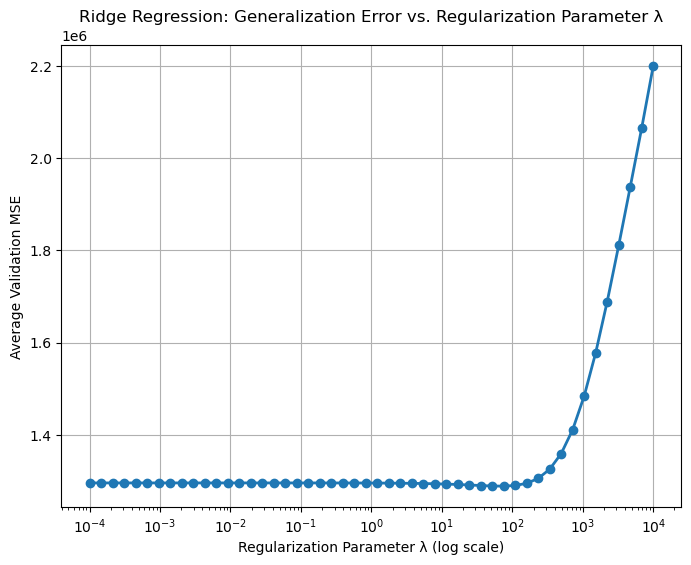

In [ ]:
lambda_values = np.logspace(-4, 4, 50)

# average validation errors
validation_errors = []

# K-fold cross-validation
K = 10
kf = KFold(n_splits=K, shuffle=True, random_state=42)

for lmbd in lambda_values:
    mse_list = []  # store MSE for each fold
    ridge = Ridge(alpha=lmbd)
    for train_index, val_index in kf.split(X_std_np):
        X_train, X_val = X_std_np[train_index], X_std_np[val_index]
        y_train, y_val = y_np[train_index], y_np[val_index]
        
        ridge.fit(X_train, y_train)
        
        # Predict on validation set
        y_pred = ridge.predict(X_val)
        
        # Calculate MSE
        mse = mean_squared_error(y_val, y_pred)
        mse_list.append(mse)
    
    # Average MSE across all folds
    avg_mse = np.mean(mse_list)
    validation_errors.append(avg_mse)

# Plotting the generalization error as a function of λ
plt.figure(figsize=(8, 6))
plt.semilogx(lambda_values, validation_errors, marker='o', linewidth=2)
plt.xlabel('Regularization Parameter λ (log scale)')
plt.ylabel('Average Validation MSE')
plt.title('Ridge Regression: Generalization Error vs. Regularization Parameter λ')
plt.grid(True)
plt.show()


In [ ]:
# Find the λ with the lowest validation error
optimal_lambda = lambda_values[np.argmin(validation_errors)]
print(f"The optimal λ is: {optimal_lambda}")

# Retrain the model using the optimal λ
optimal_ridge = Ridge(alpha=optimal_lambda)
optimal_ridge.fit(X_std_np, y_np)


The optimal λ is: 75.43120063354607


Ridge(alpha=75.43120063354607)

In [ ]:
# Try out the model

# Example:
x_new = X_std_np[0]  # First diamond in the dataset
y_pred = optimal_ridge.predict([x_new])


In [ ]:
# Get the coefficients and feature names
coefficients = optimal_ridge.coef_
intercept = optimal_ridge.intercept_
features = X_std.columns

coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Calculate the absolute value for sorting
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()

# Sort DF
coef_df_sorted = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

print(coef_df_sorted[['Feature', 'Coefficient']])


          Feature  Coefficient
0           carat  5232.561579
20    clarity_VS2  1647.577530
19    clarity_VS1  1520.296881
17    clarity_SI1  1426.512013
22   clarity_VVS2  1345.637966
21   clarity_VVS1  1173.476025
3               x  -972.446718
16     clarity_IF   896.641212
18    clarity_SI2   894.361424
15        color_J  -520.711175
14        color_I  -435.022008
7       cut_Ideal   410.490204
13        color_H  -348.924921
8     cut_Premium   333.897835
9   cut_Very Good   306.544500
12        color_G  -191.536428
6        cut_Good   168.311907
5               z  -105.766426
11        color_F  -101.423649
1           depth   -81.339806
10        color_E   -78.329496
2           table   -59.709228
4               y    12.579651


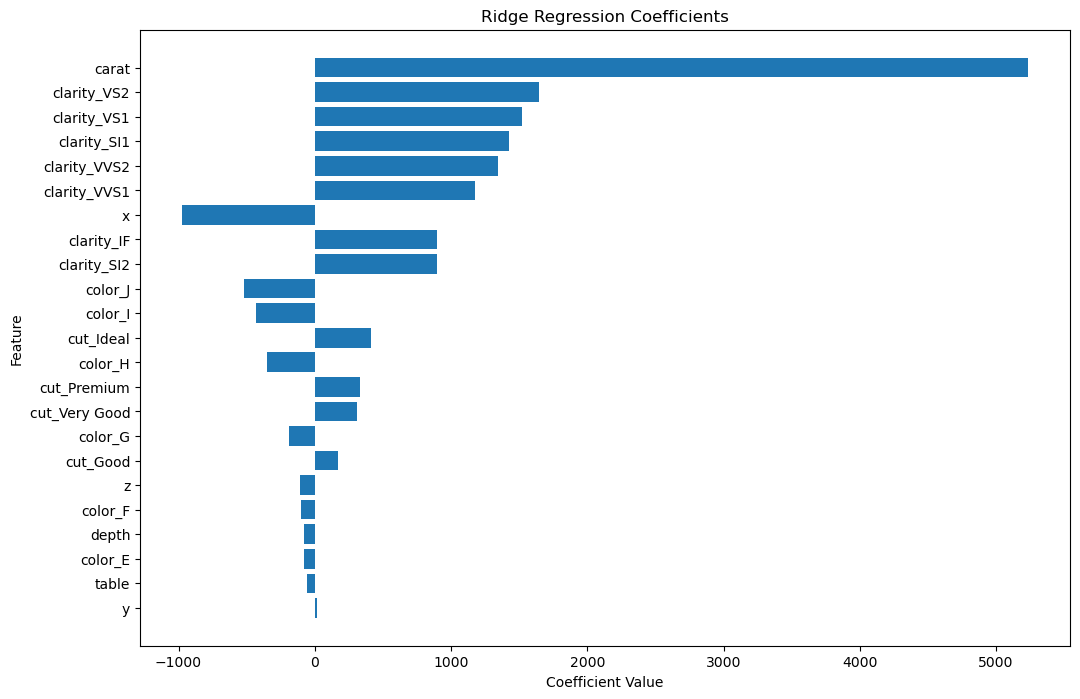

In [ ]:
# Plot the Ridge coefficients
plt.figure(figsize=(12, 8))
plt.barh(coef_df_sorted['Feature'], coef_df_sorted['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Ridge Regression Coefficients')
plt.gca().invert_yaxis()
plt.show()


# Lasso

The optimal α for Lasso is: 1.0481131341546852
          Feature  Coefficient
0           carat  5394.731313
1           depth   -94.240064
2           table   -60.001238
3               x -1150.584501
5               z   -73.011504
6        cut_Good   156.779111
7       cut_Ideal   390.831291
8     cut_Premium   315.673358
9   cut_Very Good   288.504506
10        color_E   -73.258477
11        color_F   -95.323643
12        color_G  -186.096682
13        color_H  -345.882372
14        color_I  -434.325859
15        color_J  -521.311278
16     clarity_IF   910.071197
17    clarity_SI1  1466.167687
18    clarity_SI2   926.447623
19    clarity_VS1  1552.496672
20    clarity_VS2  1685.489927
21   clarity_VVS1  1193.446471
22   clarity_VVS2  1370.365680


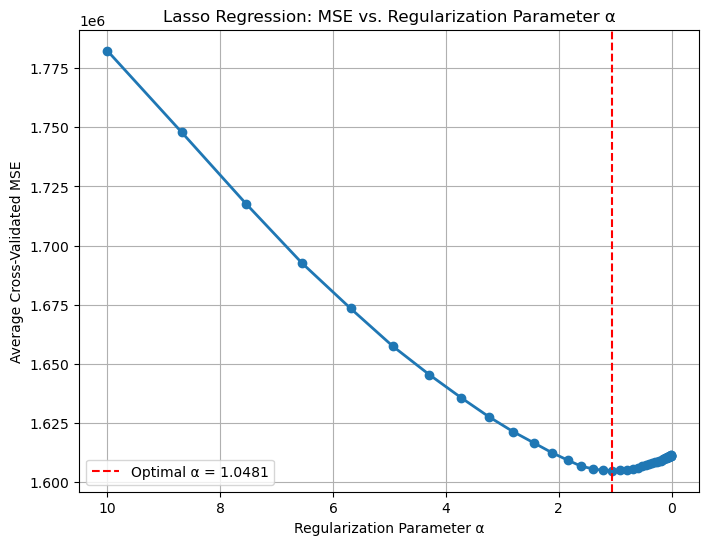

In [ ]:
import numpy as np
from sklearn.linear_model import LassoCV
import pandas as pd
import matplotlib.pyplot as plt

alphas = np.logspace(-2, 1, 50)

lasso_cv = LassoCV(alphas=alphas, cv=10, n_jobs=-1, max_iter=10000, tol=0.01)

lasso_cv.fit(X_std_np, y_np)

# Best alpha
optimal_alpha_lasso = lasso_cv.alpha_
print(f"The optimal α for Lasso is: {optimal_alpha_lasso}")

# Coefficients
coefficients_lasso = lasso_cv.coef_

coef_df_lasso = pd.DataFrame({
    'Feature': X_std.columns,
    'Coefficient': coefficients_lasso
})

# Display non-zero coefficients
non_zero_coefs = coef_df_lasso[coef_df_lasso['Coefficient'] != 0]
print(non_zero_coefs)

# Plotting the mean cross-validated MSE as a function of alpha
mse_mean_lasso = np.mean(lasso_cv.mse_path_, axis=1)
alpha_values_lasso = lasso_cv.alphas_

plt.figure(figsize=(8, 6))
plt.plot(alpha_values_lasso, mse_mean_lasso, marker='o', linewidth=2)
plt.axvline(optimal_alpha_lasso, color='r', linestyle='--', label=f'Optimal α = {optimal_alpha_lasso:.4f}')
plt.gca().invert_xaxis()
plt.xlabel('Regularization Parameter α')
plt.ylabel('Average Cross-Validated MSE')
plt.title('Lasso Regression: MSE vs. Regularization Parameter α')
plt.legend()
plt.grid(True)
plt.show()


# ElasticNet

Optimal α for ElasticNet: 0.01
Optimal l1_ratio for ElasticNet: 0.9
          Feature  Coefficient
0           carat  5293.847837
1           depth   -84.369195
2           table   -59.537119
3               x -1039.731191
4               y    15.998957
5               z  -100.376330
6        cut_Good   167.569399
7       cut_Ideal   408.975265
8     cut_Premium   332.584488
9   cut_Very Good   304.739650
10        color_E   -78.896317
11        color_F  -101.567516
12        color_G  -192.209386
13        color_H  -350.156828
14        color_I  -436.926708
15        color_J  -522.646382
16     clarity_IF   912.357817
17    clarity_SI1  1465.578158
18    clarity_SI2   927.551759
19    clarity_VS1  1552.874591
20    clarity_VS2  1685.398579
21   clarity_VVS1  1195.522772
22   clarity_VVS2  1371.583266


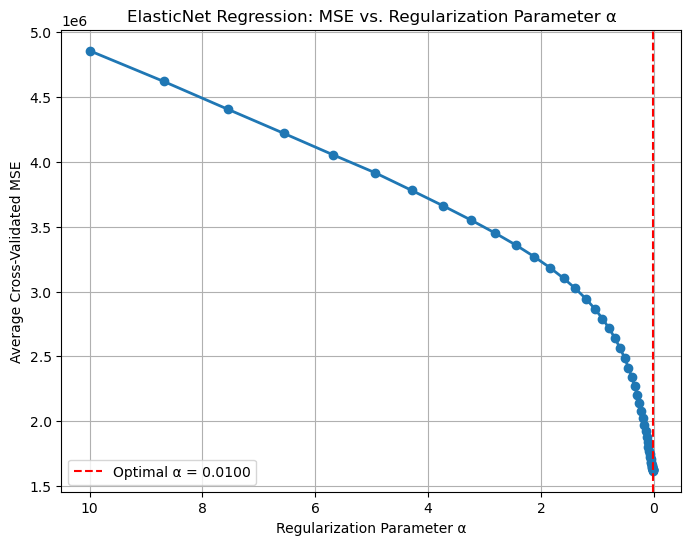

In [ ]:
from sklearn.linear_model import ElasticNetCV
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define for alpha and l1_ratio
alphas = np.logspace(-2, 1, 50)
l1_ratios = np.linspace(0.1, 0.9, 9)

# ElasticNetCV with 10-fold cross-validation
elasticnet_cv = ElasticNetCV(
    alphas=alphas,
    l1_ratio=l1_ratios,
    cv=10,
    n_jobs=-1,
    max_iter=10000,
    tol=0.01,
    random_state=42
)

elasticnet_cv.fit(X_std_np, y_np)

# Best alpha and l1_ratio
optimal_alpha_en = elasticnet_cv.alpha_
optimal_l1_ratio = elasticnet_cv.l1_ratio_
print(f"Optimal α for ElasticNet: {optimal_alpha_en}")
print(f"Optimal l1_ratio for ElasticNet: {optimal_l1_ratio}")

# Coefficients
coefficients_en = elasticnet_cv.coef_

coef_df_en = pd.DataFrame({
    'Feature': X_std.columns,
    'Coefficient': coefficients_en
})

# Display non-zero coefficients
non_zero_coefs_en = coef_df_en[coef_df_en['Coefficient'] != 0]
print(non_zero_coefs_en)

# mean MSE over folds
mse_mean_en = np.mean(elasticnet_cv.mse_path_, axis=2) 

# index of optimal l1_ratio
l1_ratio_index = np.where(l1_ratios == optimal_l1_ratio)[0][0]

# MSE path for the optimal l1_ratio
mse_mean_opt_l1 = mse_mean_en[l1_ratio_index, :]

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(elasticnet_cv.alphas_, mse_mean_opt_l1, marker='o', linewidth=2)
plt.axvline(optimal_alpha_en, color='r', linestyle='--', label=f'Optimal α = {optimal_alpha_en:.4f}')
plt.gca().invert_xaxis()
plt.xlabel('Regularization Parameter α')
plt.ylabel('Average Cross-Validated MSE')
plt.title('ElasticNet Regression: MSE vs. Regularization Parameter α')
plt.legend()
plt.grid(True)
plt.show()

# Calculating ElasticNet MSE
alpha_index_en = np.where(elasticnet_cv.alphas_ == optimal_alpha_en)[0][0]
elasticnet_mse = mse_mean_en[l1_ratio_index, alpha_index_en]


# Comparing models

In [ ]:
# get num of non-zero coefficients
ridge_non_zero = np.sum(optimal_ridge.coef_ != 0)
lasso_non_zero = np.sum(lasso_cv.coef_ != 0)
elasticnet_non_zero = np.sum(elasticnet_cv.coef_ != 0)

# best validation MSE
ridge_mse = validation_errors[np.argmin(validation_errors)]

# Lasso MSE
alpha_index_lasso = np.where(lasso_cv.alphas_ == optimal_alpha_lasso)[0][0]
lasso_mse = np.mean(lasso_cv.mse_path_[alpha_index_lasso, :])

# summary DataFrame
summary_df = pd.DataFrame({
    'Model': ['Ridge', 'Lasso', 'ElasticNet'],
    'Optimal Alpha': [optimal_lambda, optimal_alpha_lasso, optimal_alpha_en],
    'Optimal l1_ratio': [np.nan, 1.0, optimal_l1_ratio],
    'Validation MSE': [ridge_mse, lasso_mse, elasticnet_mse],
    'Non-Zero Coefficients': [ridge_non_zero, lasso_non_zero, elasticnet_non_zero]
})

print(summary_df)



        Model  Optimal Alpha  Optimal l1_ratio  Validation MSE  \
0       Ridge      75.431201               NaN    1.288958e+06   
1       Lasso       1.048113               1.0    1.604807e+06   
2  ElasticNet       0.010000               0.9    1.617284e+06   

   Non-Zero Coefficients  
0                     23  
1                     22  
2                     23  


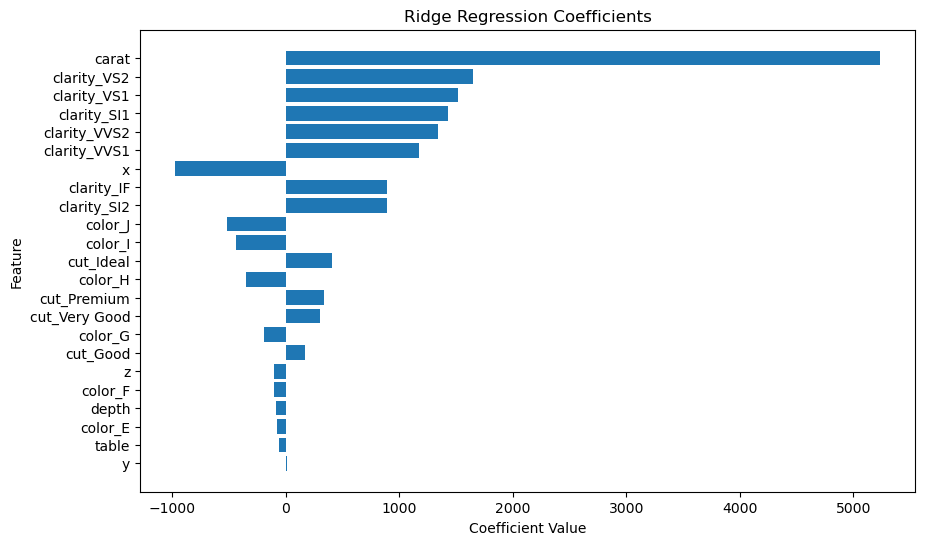

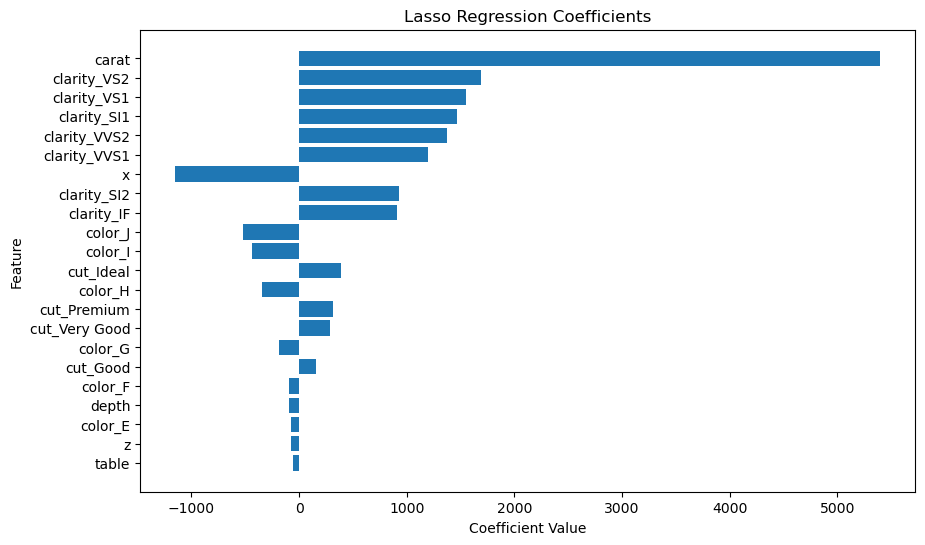

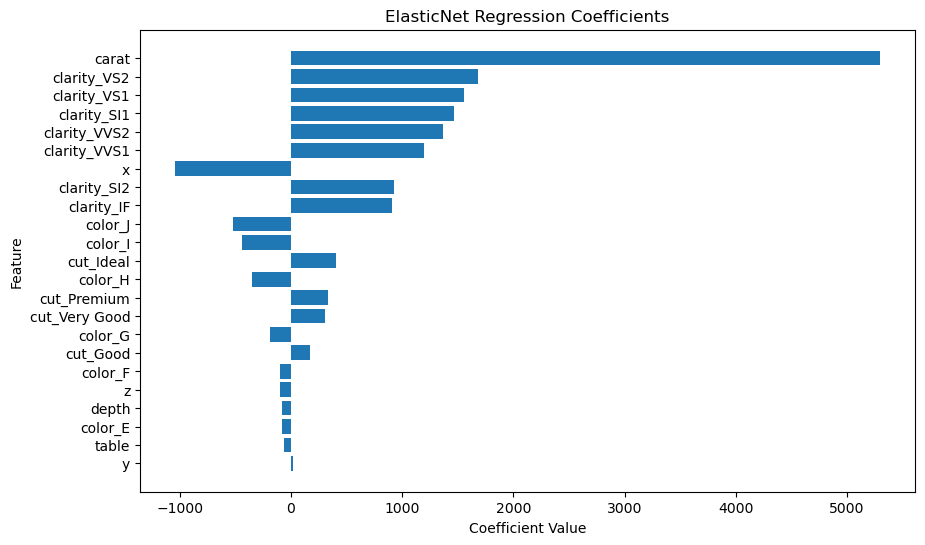

In [ ]:
#Plot all 3 regression coefficients
def plot_coefficients(model_name, coefficients, features):
    coef_df = pd.DataFrame({
        'Feature': features,
        'Coefficient': coefficients
    })
    coef_df = coef_df[coef_df['Coefficient'] != 0]
    
    coef_df_sorted = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)
    
    plt.figure(figsize=(10, 6))
    plt.barh(coef_df_sorted['Feature'], coef_df_sorted['Coefficient'])
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.title(f'{model_name} Regression Coefficients')
    plt.gca().invert_yaxis()
    plt.show()

# Plotting coefficients
plot_coefficients('Ridge', optimal_ridge.coef_, X_std.columns)
plot_coefficients('Lasso', lasso_cv.coef_, X_std.columns)
plot_coefficients('ElasticNet', elasticnet_cv.coef_, X_std.columns)


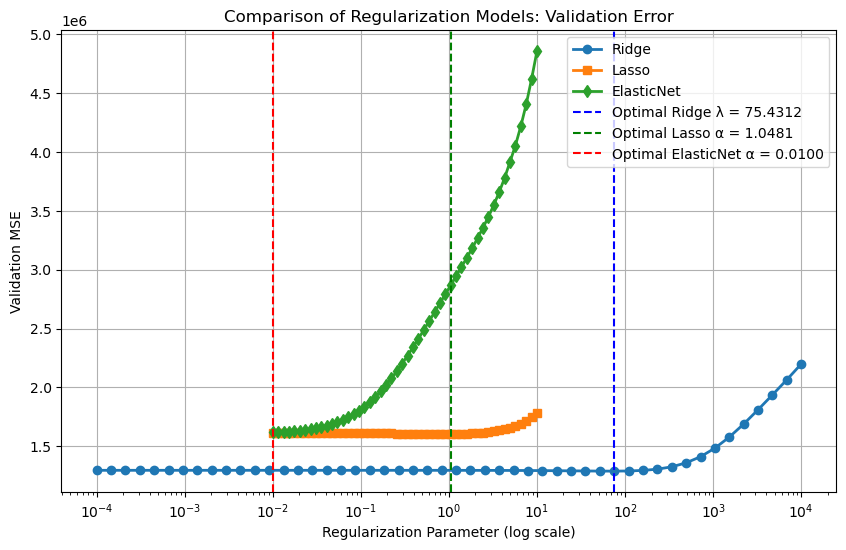

In [51]:
# Plot all validation errors together
plt.figure(figsize=(10, 6))
plt.semilogx(lambda_values, validation_errors, label='Ridge', marker='o', linewidth=2)
plt.plot(alpha_values_lasso, mse_mean_lasso, label='Lasso', marker='s', linewidth=2)
plt.plot(elasticnet_cv.alphas_, mse_mean_opt_l1, label='ElasticNet', marker='d', linewidth=2)

plt.axvline(optimal_lambda, color='b', linestyle='--', label=f'Optimal Ridge λ = {optimal_lambda:.4f}')
plt.axvline(optimal_alpha_lasso, color='g', linestyle='--', label=f'Optimal Lasso α = {optimal_alpha_lasso:.4f}')
plt.axvline(optimal_alpha_en, color='r', linestyle='--', label=f'Optimal ElasticNet α = {optimal_alpha_en:.4f}')

plt.xlabel('Regularization Parameter (log scale)')
plt.ylabel('Validation MSE')
plt.title('Comparison of Regularization Models: Validation Error')
plt.legend()
plt.grid(True)
plt.show()


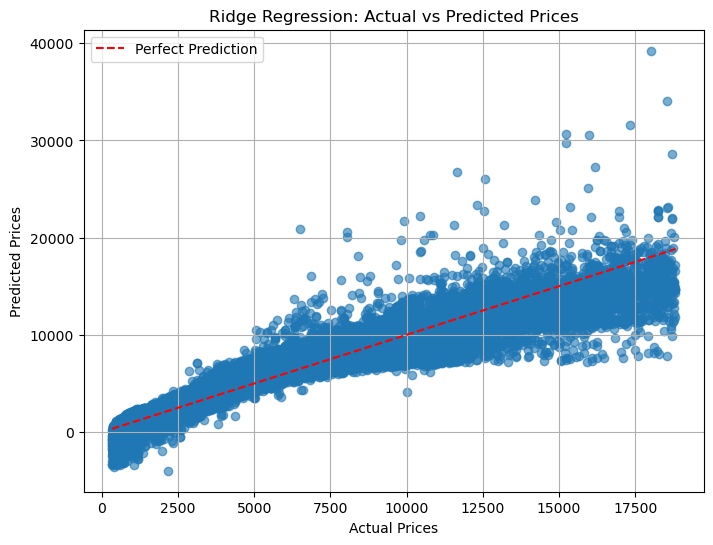

In [ ]:
# Generate predictions for the entire dataset
y_pred = optimal_ridge.predict(X_std_np)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_np, y_pred, alpha=0.6)
plt.plot([min(y_np), max(y_np)], [min(y_np), max(y_np)], color='r', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Ridge Regression: Actual vs Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()


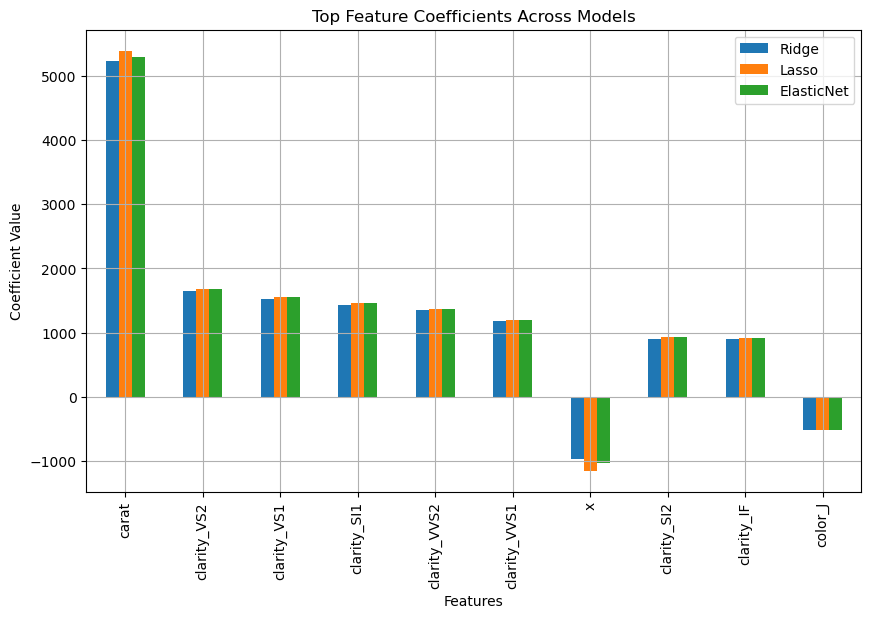

In [ ]:
# DF for coefficients comparison
coef_comparison_df = pd.DataFrame({
    'Feature': X_std.columns,
    'Ridge': optimal_ridge.coef_,
    'Lasso': lasso_cv.coef_,
    'ElasticNet': elasticnet_cv.coef_
}).set_index('Feature')

# Plot top N coefficients
top_features = coef_comparison_df.abs().sum(axis=1).sort_values(ascending=False).head(10).index

coef_comparison_df.loc[top_features].plot(kind='bar', figsize=(10, 6))
plt.title('Top Feature Coefficients Across Models')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()


# Evaluation

R-squared

In [58]:
from sklearn.metrics import r2_score

# Predict on the training data
y_train_pred = optimal_ridge.predict(X_std_np)

# Calculate R-squared
r2 = r2_score(y_np, y_train_pred)

print(f"R-squared: {r2:.4f}")


R-squared: 0.9199


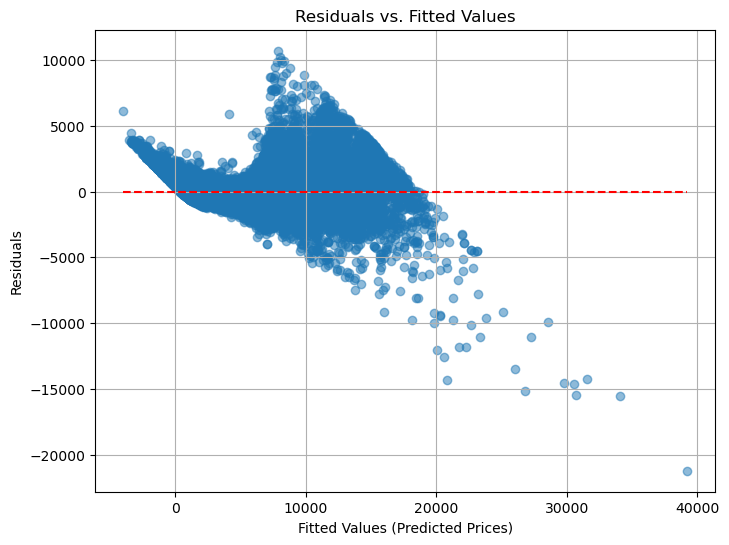

In [59]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_np - y_train_pred

# Plot residuals vs. fitted values
plt.figure(figsize=(8, 6))
plt.scatter(y_train_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=min(y_train_pred), xmax=max(y_train_pred), colors='r', linestyles='--')
plt.xlabel('Fitted Values (Predicted Prices)')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.grid(True)
plt.show()


In [60]:
n_iterations = 1000
n_size = int(len(X_std_np) * 0.8)  # Use 80% of data for each sample
coefficient_samples = np.zeros((n_iterations, X_std_np.shape[1]))

np.random.seed(42)  # For reproducibility

for i in range(n_iterations):
    # Generate a bootstrap sample
    indices = np.random.choice(range(len(X_std_np)), size=n_size, replace=True)
    X_sample = X_std_np[indices]
    y_sample = y_np[indices]
    
    # Fit the Ridge model
    ridge = Ridge(alpha=optimal_lambda)
    ridge.fit(X_sample, y_sample)
    
    # Store the coefficients
    coefficient_samples[i, :] = ridge.coef_

# Calculate the standard deviation of coefficients
coef_std = coefficient_samples.std(axis=0)

# Create a DataFrame with coefficient means and standard deviations
coef_bootstrap_df = pd.DataFrame({
    'Feature': X_std.columns,
    'Coefficient_Mean': coefficient_samples.mean(axis=0),
    'Coefficient_STD': coef_std
})

# Display the results
print(coef_bootstrap_df)

          Feature  Coefficient_Mean  Coefficient_STD
0           carat       5194.275369        87.958343
1           depth        -49.372158        39.108594
2           table        -60.159224         7.759260
3               x       -784.063001       256.769894
4               y        112.400509       159.665429
5               z       -359.921021       330.442305
6        cut_Good        167.548155        14.115830
7       cut_Ideal        409.853993        24.390425
8     cut_Premium        333.160965        20.885635
9   cut_Very Good        306.659977        20.073483
10        color_E        -78.351122         7.331034
11        color_F       -101.309251         8.017156
12        color_G       -191.097554         8.427087
13        color_H       -348.628216         7.987266
14        color_I       -434.242369         7.989871
15        color_J       -519.455806         8.286035
16     clarity_IF        882.523049        21.477330
17    clarity_SI1       1390.159260        44.

In [61]:
# Calculate 95% confidence intervals
coef_bootstrap_df['CI Lower'] = coef_bootstrap_df['Coefficient_Mean'] - 1.96 * coef_bootstrap_df['Coefficient_STD']
coef_bootstrap_df['CI Upper'] = coef_bootstrap_df['Coefficient_Mean'] + 1.96 * coef_bootstrap_df['Coefficient_STD']

# Display the results
print(coef_bootstrap_df[['Feature', 'Coefficient_Mean', 'CI Lower', 'CI Upper']])


          Feature  Coefficient_Mean     CI Lower     CI Upper
0           carat       5194.275369  5021.877017  5366.673721
1           depth        -49.372158  -126.025003    27.280687
2           table        -60.159224   -75.367374   -44.951075
3               x       -784.063001 -1287.331994  -280.794009
4               y        112.400509  -200.543732   425.344751
5               z       -359.921021 -1007.587939   287.745896
6        cut_Good        167.548155   139.881129   195.215182
7       cut_Ideal        409.853993   362.048760   457.659226
8     cut_Premium        333.160965   292.225121   374.096810
9   cut_Very Good        306.659977   267.315951   346.004003
10        color_E        -78.351122   -92.719949   -63.982294
11        color_F       -101.309251  -117.022877   -85.595625
12        color_G       -191.097554  -207.614644  -174.580464
13        color_H       -348.628216  -364.283257  -332.973176
14        color_I       -434.242369  -449.902517  -418.582221
15      

# Classification

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Assuming 'price' is a column in the dataset 'data'
# Define price bins and labels
bins = [0, 2000, 5000, data['price'].max()]  # Adjust these bin edges if needed
labels = ['Low', 'Medium', 'High']


# Create a new column 'price_category' with categorical labels
data['price_category'] = pd.cut(data['price'], bins=bins, labels=labels)

# Convert price categories to numeric labels for classification
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['price_category'])

# Check encoding
print("Encoded price categories:", label_encoder.classes_)
print("Target distribution:\n", np.bincount(y))

# Select the relevant columns for X
X_columns = ['carat', 'depth', 'table', 'x', 'y', 'z'] + [col for col in data.columns if col.startswith('cut_') or col.startswith('color_') or col.startswith('clarity_')]
X = data[X_columns].values  # Convert to a numpy array for model compatibility

# Verify shape of X and check the first few rows to confirm
print("Shape of X:", X.shape)
print("First few rows of X:\n", X[:5])

X.head()


NameError: name 'data' is not defined

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming X (features) and y (target) are defined

# Task 1: Verify the Target Variable
# Check target distribution to understand the classes
print("Target classes:", np.unique(y))
print("Class distribution:\n", np.bincount(y))

# Task 2: Implement a Baseline Model
# Set up a baseline model that predicts the most frequent class
baseline_model = DummyClassifier(strategy="most_frequent")
baseline_model.fit(X, y)
baseline_predictions = baseline_model.predict(X)

# Evaluate baseline performance (Accuracy is one simple metric)
baseline_accuracy = accuracy_score(y, baseline_predictions)
print("Baseline Model Accuracy:", baseline_accuracy)

# Task 3: Set Up Two-Level Cross-Validation
# Define cross-validation splits
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Logistic Regression and K-Nearest Neighbors as example classifiers
logistic_model = LogisticRegression(max_iter=1000)
knn_model = KNeighborsClassifier(n_neighbors=5)  # Try different values for `n_neighbors`

# Use outer loop to evaluate models and inner loop for parameter tuning
outer_scores = {'Logistic': [], 'KNN': []}

for train_idx, test_idx in outer_cv.split(X, y):
    # Split the data
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Inner cross-validation to tune parameters (simplified here; use GridSearchCV for complex tuning)
    logistic_model.fit(X_train, y_train)
    knn_model.fit(X_train, y_train)
    
    # Evaluate on test set of outer CV
    logistic_pred = logistic_model.predict(X_test)
    knn_pred = knn_model.predict(X_test)
    
    # Append scores
    outer_scores['Logistic'].append(accuracy_score(y_test, logistic_pred))
    outer_scores['KNN'].append(accuracy_score(y_test, knn_pred))

# Print average performance for each model
print("Logistic Regression Average Accuracy:", np.mean(outer_scores['Logistic']))
print("KNN Average Accuracy:", np.mean(outer_scores['KNN']))


Target classes: [0 1 2]
Class distribution:
 [14703 24207 15010]
Baseline Model Accuracy: 0.44894287833827895


/Users/victorwintherlarsen/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/victorwintherlarsen/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

Logistic Regression Average Accuracy: 0.8738686943620178
KNN Average Accuracy: 0.8729784866468844
